In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.metrics import explained_variance_score
from sklearn.ensemble import GradientBoostingRegressor


In [2]:
df = pd.read_csv('/kaggle/input/nifty500-stocks-dataset/nifty_500.csv')


# Data Preprocessing

In [3]:
df.head()

,Company Name,Symbol,Industry,Series,Open,High,Low,Previous Close,Last Traded Price,Change,Percentage Change,Share Volume,Value (Indian Rupee),52 Week High,52 Week Low,365 Day Percentage Change,30 Day Percentage Change
0,3M India Ltd.,3MINDIA,Diversified,EQ,21950.00,21999.00,21126.05,21854.05,21575.00,-279.05,-1.28,4159,8.965357e+07,27800.00,17273.00,-10.18,8.22
1,Aarti Drugs Ltd.,AARTIDRUGS,Healthcare,EQ,400.50,401.80,394.10,403.85,400.00,-3.85,-0.95,31782,1.262731e+07,749.75,378.00,-42.92,-5.10
2,Aavas Financiers Ltd.,AAVAS,Financial Services,EQ,1997.10,2004.05,1894.50,2015.45,1943.15,-72.30,-3.59,150704,2.907728e+08,3340.00,1815.00,-25.69,-9.39
3,ABB India Ltd.,ABB,Capital Goods,EQ,2260.35,2311.50,2260.35,2300.90,2280.00,-20.90,-0.91,97053,2.210935e+08,2487.85,1618.05,27.25,-5.21
4,Abbott India Ltd.,ABBOTINDIA,Healthcare,EQ,18700.40,19200.00,18605.00,18760.40,19199.80,439.40,2.34,12396,2.346770e+08,23934.45,15514.00,11.61,5.84


In [4]:
df.tail()

,Company Name,Symbol,Industry,Series,Open,High,Low,Previous Close,Last Traded Price,Change,Percentage Change,Share Volume,Value (Indian Rupee),52 Week High,52 Week Low,365 Day Percentage Change,30 Day Percentage Change
496,Zensar Technolgies Ltd.,ZENSARTECH,Information Technology,EQ,273.15,273.55,268.40,272.10,270.0,-2.10,-0.77,186578,5.046748e+07,587.00,246.65,-12.61,-11.02
497,ZF Commercial Vehicle Control Systems India Ltd.,ZFCVINDIA,Automobile and Auto Components,EQ,7748.00,7900.00,7525.30,7716.60,7680.0,-36.60,-0.47,12790,9.884624e+07,8780.05,6793.30,-,1.43
498,Zomato Ltd.,ZOMATO,Consumer Services,EQ,54.15,56.70,52.55,53.85,56.0,2.15,3.99,112078641,6.193466e+09,169.00,50.05,-,-27.86
499,Zydus Lifesciences Ltd.,ZYDUSLIFE,Healthcare,EQ,356.90,364.05,354.30,357.00,364.0,7.00,1.96,862373,3.100145e+08,651.90,319.00,-,-5.64
500,Zydus Wellness Ltd.,ZYDUSWELL,Fast Moving Consumer Goods,EQ,1635.00,1635.00,1605.00,1636.85,1627.0,-9.85,-0.60,10803,1.749567e+07,2476.85,1430.00,-22.08,6.25


In [5]:
df.shape

(501, 17)

In [6]:
df.describe()

,Open,High,Low,Previous Close,Last Traded Price,Share Volume,Value (Indian Rupee),52 Week High,52 Week Low
count,501.000000,501.000000,501.000000,501.000000,501.000000,5.010000e+02,5.010000e+02,501.000000,501.000000
mean,1525.904491,1553.804990,1504.042415,1528.061277,1536.925449,2.580350e+06,8.635146e+08,2182.632196,1281.628982
std,4466.627117,4576.377692,4435.492332,4477.209376,4532.004734,9.407021e+06,4.335973e+09,5728.930152,3850.529646
min,6.750000,6.950000,6.700000,6.850000,6.800000,1.507000e+03,2.587223e+06,13.100000,4.550000
25%,215.300000,221.550000,210.600000,217.200000,214.650000,7.740500e+04,4.502265e+07,328.700000,166.800000
50%,551.100000,569.100000,547.000000,554.750000,563.000000,3.296100e+05,1.533133e+08,818.000000,438.050000
75%,1404.500000,1421.250000,1396.850000,1411.700000,1410.000000,1.235612e+06,6.644570e+08,2096.750000,1128.800000
max,70300.000000,72500.000000,70300.000000,70800.900000,71900.000000,1.257883e+08,9.211987e+10,87550.000000,63000.000000


In [7]:
df.sample()

,Company Name,Symbol,Industry,Series,Open,High,Low,Previous Close,Last Traded Price,Change,Percentage Change,Share Volume,Value (Indian Rupee),52 Week High,52 Week Low,365 Day Percentage Change,30 Day Percentage Change
472,Union Bank of India,UNIONBANK,Financial Services,EQ,34.4,34.65,34.0,34.25,34.55,0.30,0.88,2376699,81520775.7,54.8,32.7,-11.15,-9.51


In [8]:
df.isnull().sum()

Company Name                 0
Symbol                       0
Industry                     0
Series                       0
Open                         0
High                         0
Low                          0
Previous Close               0
Last Traded Price            0
Change                       0
Percentage Change            0
Share Volume                 0
Value (Indian Rupee)         0
52 Week High                 0
52 Week Low                  0
365 Day Percentage Change    0
30 Day Percentage Change     0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Company Name               501 non-null    object 
 1   Symbol                     501 non-null    object 
 2   Industry                   501 non-null    object 
 3   Series                     501 non-null    object 
 4   Open                       501 non-null    float64
 5   High                       501 non-null    float64
 6   Low                        501 non-null    float64
 7   Previous Close             501 non-null    float64
 8   Last Traded Price          501 non-null    float64
 9   Change                     501 non-null    object 
 10  Percentage Change          501 non-null    object 
 11  Share Volume               501 non-null    int64  
 12  Value (Indian Rupee)       501 non-null    float64
 13  52 Week High               501 non-null    float64

In [10]:
 df["Industry"].value_counts()

Industry
Financial Services                   88
Healthcare                           52
Capital Goods                        48
Chemicals                            38
Fast Moving Consumer Goods           33
Information Technology               29
Consumer Durables                    28
Automobile and Auto Components       27
Consumer Services                    24
Services                             21
Oil Gas & Consumable Fuels           17
Construction                         14
Metals & Mining                      14
Construction Materials               13
Power                                11
Realty                               11
Textiles                             10
Telecommunication                    10
Media Entertainment & Publication     9
Forest Materials                      2
Diversified                           2
Name: count, dtype: int64

In [11]:
# Veri setinin sütun veri tiplerini kontrol etme
print(df.dtypes)


Company Name                  object
Symbol                        object
Industry                      object
Series                        object
Open                         float64
High                         float64
Low                          float64
Previous Close               float64
Last Traded Price            float64
Change                        object
Percentage Change             object
Share Volume                   int64
Value (Indian Rupee)         float64
52 Week High                 float64
52 Week Low                  float64
365 Day Percentage Change     object
30 Day Percentage Change      object
dtype: object


# Nan Values

In [12]:
# Tüm veri setindeki eksik değerleri NaN ile değiştirme
df.replace('-', np.nan, inplace=True)


In [13]:
# Eksik verilere sahip sütunları kontrol etme
nan_columns = df.columns[df.isnull().any()].tolist()
print("Eksik Verilere Sahip Sütunlar:")
print(nan_columns)


Eksik Verilere Sahip Sütunlar:
['Change', 'Percentage Change', '365 Day Percentage Change', '30 Day Percentage Change']


In [14]:
df['Change'] = df['Change'].str.replace(',', '.', regex=True)    # veri setinde change sütunundaki virgüllü değeri noktaya çevirdi
df['Change'] = pd.to_numeric(df['Change'], errors='coerce')


In [15]:
# Eksik verileri medyan ile doldurma
median_change = df['Change'].median()
df['Change'].fillna(median_change, inplace=True)

median_percentage_change = df['Percentage Change'].median()
df['Percentage Change'].fillna(median_percentage_change, inplace=True)

median_365 = df['365 Day Percentage Change'].median()
df['365 Day Percentage Change'].fillna(median_365, inplace=True)

median_30 = df['30 Day Percentage Change'].median()
df['30 Day Percentage Change'].fillna(median_30, inplace=True)

In [16]:
df

,Company Name,Symbol,Industry,Series,Open,High,Low,Previous Close,Last Traded Price,Change,Percentage Change,Share Volume,Value (Indian Rupee),52 Week High,52 Week Low,365 Day Percentage Change,30 Day Percentage Change
0,3M India Ltd.,3MINDIA,Diversified,EQ,21950.00,21999.00,21126.05,21854.05,21575.00,-279.05,-1.28,4159,8.965357e+07,27800.00,17273.00,-10.18,8.22
1,Aarti Drugs Ltd.,AARTIDRUGS,Healthcare,EQ,400.50,401.80,394.10,403.85,400.00,-3.85,-0.95,31782,1.262731e+07,749.75,378.00,-42.92,-5.10
2,Aavas Financiers Ltd.,AAVAS,Financial Services,EQ,1997.10,2004.05,1894.50,2015.45,1943.15,-72.30,-3.59,150704,2.907728e+08,3340.00,1815.00,-25.69,-9.39
3,ABB India Ltd.,ABB,Capital Goods,EQ,2260.35,2311.50,2260.35,2300.90,2280.00,-20.90,-0.91,97053,2.210935e+08,2487.85,1618.05,27.25,-5.21
4,Abbott India Ltd.,ABBOTINDIA,Healthcare,EQ,18700.40,19200.00,18605.00,18760.40,19199.80,439.40,2.34,12396,2.346770e+08,23934.45,15514.00,11.61,5.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,Zensar Technolgies Ltd.,ZENSARTECH,Information Technology,EQ,273.15,273.55,268.40,272.10,270.00,-2.10,-0.77,186578,5.046748e+07,587.00,246.65,-12.61,-11.02
497,ZF Commercial Vehicle Control Systems India Ltd.,ZFCVINDIA,Automobile and Auto Components,EQ,7748.00,7900.00,7525.30,7716.60,7680.00,-36.60,-0.47,12790,9.884624e+07,8780.05,6793.30,-11.06,1.43
498,Zomato Ltd.,ZOMATO,Consumer Services,EQ,54.15,56.70,52.55,53.85,56.00,2.15,3.99,112078641,6.193466e+09,169.00,50.05,-11.06,-27.86
499,Zydus Lifesciences Ltd.,ZYDUSLIFE,Healthcare,EQ,356.90,364.05,354.30,357.00,364.00,7.00,1.96,862373,3.100145e+08,651.90,319.00,-11.06,-5.64


# Unique Values

'Industry' sütununu incelemek hangi endüstrilerin daha fazla temsil edildiğini ve verilerin dağılımını anlaşılır kılabilir.

In [17]:
# İlgilenilen kategorik sütunu seçin (örneğin, 'Industry' sütunu)
industry_counts = df['Industry'].value_counts()

# Benzersiz değerleri ve bu değerlerin frekanslarını görüntüleyin
print("Benzersiz Değerler ve Frekansları:")
print(industry_counts)

# Benzersiz değer sayısını görüntüleyin
print("Benzersiz Değer Sayısı:", len(industry_counts))


Benzersiz Değerler ve Frekansları:
Industry
Financial Services                   88
Healthcare                           52
Capital Goods                        48
Chemicals                            38
Fast Moving Consumer Goods           33
Information Technology               29
Consumer Durables                    28
Automobile and Auto Components       27
Consumer Services                    24
Services                             21
Oil Gas & Consumable Fuels           17
Construction                         14
Metals & Mining                      14
Construction Materials               13
Power                                11
Realty                               11
Textiles                             10
Telecommunication                    10
Media Entertainment & Publication     9
Forest Materials                      2
Diversified                           2
Name: count, dtype: int64
Benzersiz Değer Sayısı: 21


Bu sütunu incelemek hangi şirketlerin veri setinde daha fazla temsil edildiğini ve bu şirketlerin hisse senedi performanslarını incelemeyi sağlar.

In [18]:
# İlgilenilen kategorik sütunu seçme
industry_counts = df['Company Name'].value_counts()

# Benzersiz değerleri ve bu değerlerin frekanslarını görüntüleyin
print("Benzersiz Değerler ve Frekansları:")
print(industry_counts)

# Benzersiz değer sayısını görüntüleyin
print("Benzersiz Değer Sayısı:", len(industry_counts))


Benzersiz Değerler ve Frekansları:
Company Name
3M India Ltd.                    1
NMDC Ltd.                        1
Piramal Enterprises Ltd.         1
PCBL Ltd.                        1
One 97 Communications Ltd.       1
                                ..
GMR Infrastructure Ltd.          1
GMM Pfaudler Ltd.                1
Glenmark Life Sciences Ltd.      1
Glenmark Pharmaceuticals Ltd.    1
Zydus Wellness Ltd.              1
Name: count, Length: 501, dtype: int64
Benzersiz Değer Sayısı: 501


'Series' sütunu hisse senetlerinin türlerini veya kategorilerini belirtebilir. Bu sütun hangi türde hisse senetlerinin daha yaygın olduğunu ve bu türlerin performansının nasıl olduğu incelenebilir.

In [19]:
# İlgilenilen kategorik sütunu seç
industry_counts = df['Series'].value_counts()

# Benzersiz değerleri ve bu değerlerin frekanslarını görüntüleyin
print("Benzersiz Değerler ve Frekansları:")
print(industry_counts)

# Benzersiz değer sayısını görüntüleyin
print("Benzersiz Değer Sayısı:", len(industry_counts))


Benzersiz Değerler ve Frekansları:
Series
EQ    500
BE      1
Name: count, dtype: int64
Benzersiz Değer Sayısı: 2


In [20]:
print(df['365 Day Percentage Change'].unique())

['-10.18' '-42.92' '-25.69' '27.25' '11.61' '-23.75' '9.87' -11.06 '5.32'
 '45.33' '-4.50' '-35.78' '-39.22' '3.91' '-42.50' '-6.28' '-30.00'
 '64.50' '-38.43' '-23.22' '6.56' '-19.72' '-47.83' '-26.01' '1.76'
 '-17.73' '60.43' '20.55' '-9.94' '15.55' '-16.79' '-25.09' '-10.55'
 '-42.88' '-46.84' '-20.70' '-14.90' '-10.34' '-0.29' '-9.72' '26.86'
 '-10.23' '7.24' '-4.02' '1.05' '-20.21' '13.39' '-43.07' '4.97' '4.51'
 '-13.50' '-31.75' '40.27' '90.32' '31.52' '-29.41' '-14.45' '30.31'
 '-31.43' '-28.19' '34.59' '10.75' '1.36' '-34.12' '58.88' '-5.02'
 '-33.71' '-11.60' '-19.15' '19.36' '-18.57' '6.49' '18.25' '-27.81'
 '6.03' '13.88' '-31.66' '-39.86' '29.95' '30.97' '-7.85' '-90.75' '29.13'
 '77.57' '-13.19' '20.70' '-10.42' '-5.63' '26.56' '-19.08' '-14.87'
 '-11.80' '5.80' '35.44' '29.43' '-21.73' '-44.38' '-20.14' '13.86'
 '-11.98' '-12.80' '-32.12' '-66.80' '3.56' '-3.99' '-6.09' '-79.85'
 '-17.65' '-19.14' '11.24' '1.85' '-18.98' '-0.66' '-28.75' '4.61' '24.42'
 '11.57' '73.27' '

In [21]:
median_365 = df['365 Day Percentage Change'].median()
print(median_365)


-11.06


In [22]:
#  değerleri düzeltme
df['365 Day Percentage Change'] = df['365 Day Percentage Change'].apply(lambda x: float(x.replace('-', '')) if isinstance(x, str) else x)

# '365 Day Percentage Change' sütununu sayısal değere dönüştürme
df['365 Day Percentage Change'] = pd.to_numeric(df['365 Day Percentage Change'], errors='coerce')


In [23]:
median_30 = df['30 Day Percentage Change'].median()
print(median_30)


-6.01


In [24]:
# '-' içeren string değerleri NaN olarak doldurma
df['30 Day Percentage Change'] = df['30 Day Percentage Change'].replace('-', np.nan)

# sütununu sayısal değere dönüştürme
df['30 Day Percentage Change'] = pd.to_numeric(df['30 Day Percentage Change'], errors='coerce')

df['30 Day Percentage Change'].fillna(df['30 Day Percentage Change'].mean(), inplace=True)


# Data Visualization

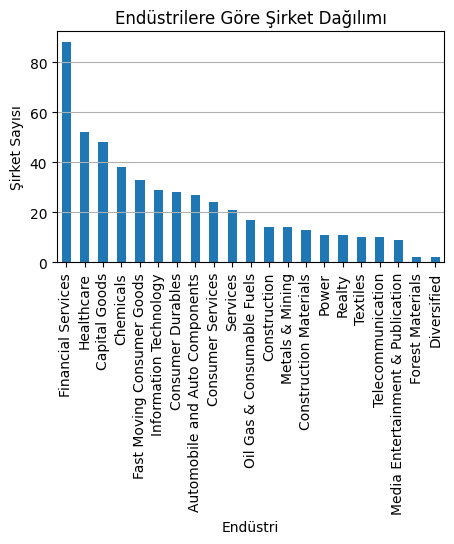

In [25]:
# Her endüstri için şirket sayısını hesaplama
industry_counts = df['Industry'].value_counts()

plt.figure(figsize=(5, 3))
industry_counts.plot(kind='bar')
plt.title('Endüstrilere Göre Şirket Dağılımı')
plt.xlabel('Endüstri')
plt.ylabel('Şirket Sayısı')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()


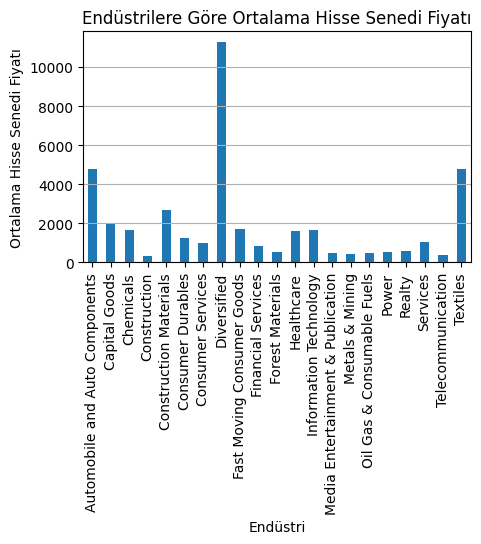

In [26]:
# Endüstrilere göre hisse senedi fiyatı
industry_mean_prices = df.groupby('Industry')['Last Traded Price'].mean()
plt.figure(figsize=(5, 3))
industry_mean_prices.plot(kind='bar')
plt.title('Endüstrilere Göre Ortalama Hisse Senedi Fiyatı')
plt.xlabel('Endüstri')
plt.ylabel('Ortalama Hisse Senedi Fiyatı')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()


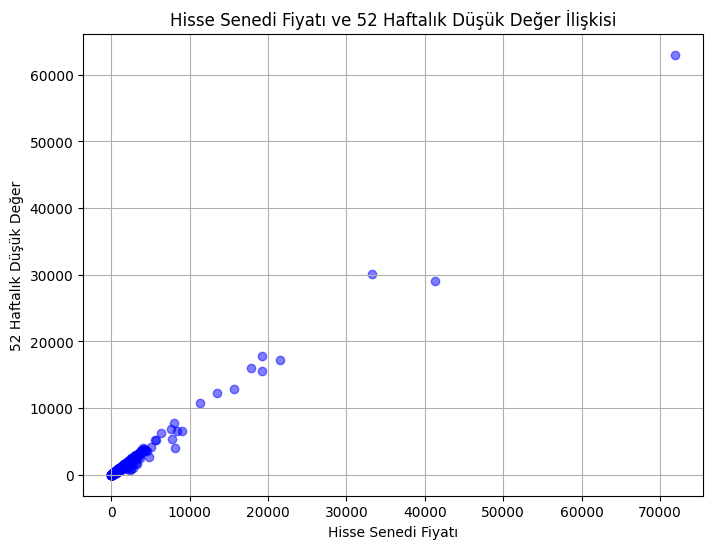

In [27]:
# Hisse senedi fiyatı ile 52 haftalık düşük değer arasındaki ilişkiyi gösteren bir scatter plot.
plt.figure(figsize=(8, 6))
plt.scatter(df['Last Traded Price'], df['52 Week Low'], color='b', alpha=0.5)
plt.title('Hisse Senedi Fiyatı ve 52 Haftalık Düşük Değer İlişkisi')
plt.xlabel('Hisse Senedi Fiyatı')
plt.ylabel('52 Haftalık Düşük Değer')
plt.grid(True)
plt.show()



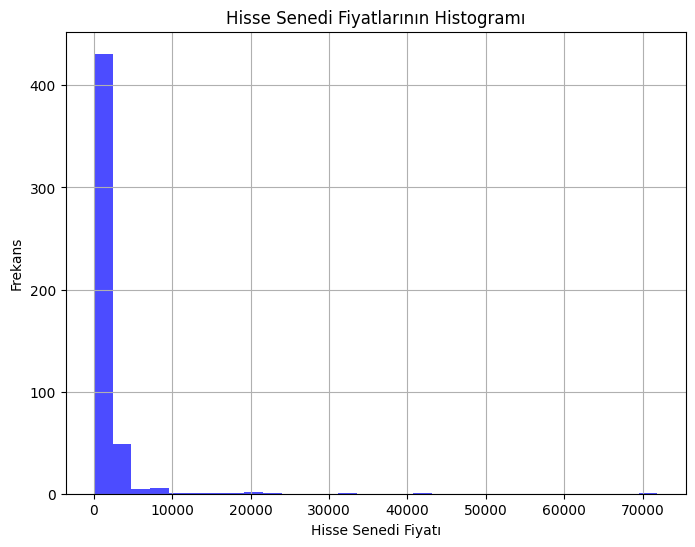

In [28]:
# Hisse senedi fiyatlarının histogramı
plt.figure(figsize=(8, 6))
plt.hist(df['Last Traded Price'], bins=30, color='b', alpha=0.7)
plt.title('Hisse Senedi Fiyatlarının Histogramı')
plt.xlabel('Hisse Senedi Fiyatı')
plt.ylabel('Frekans')
plt.grid(True)
plt.show()



/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


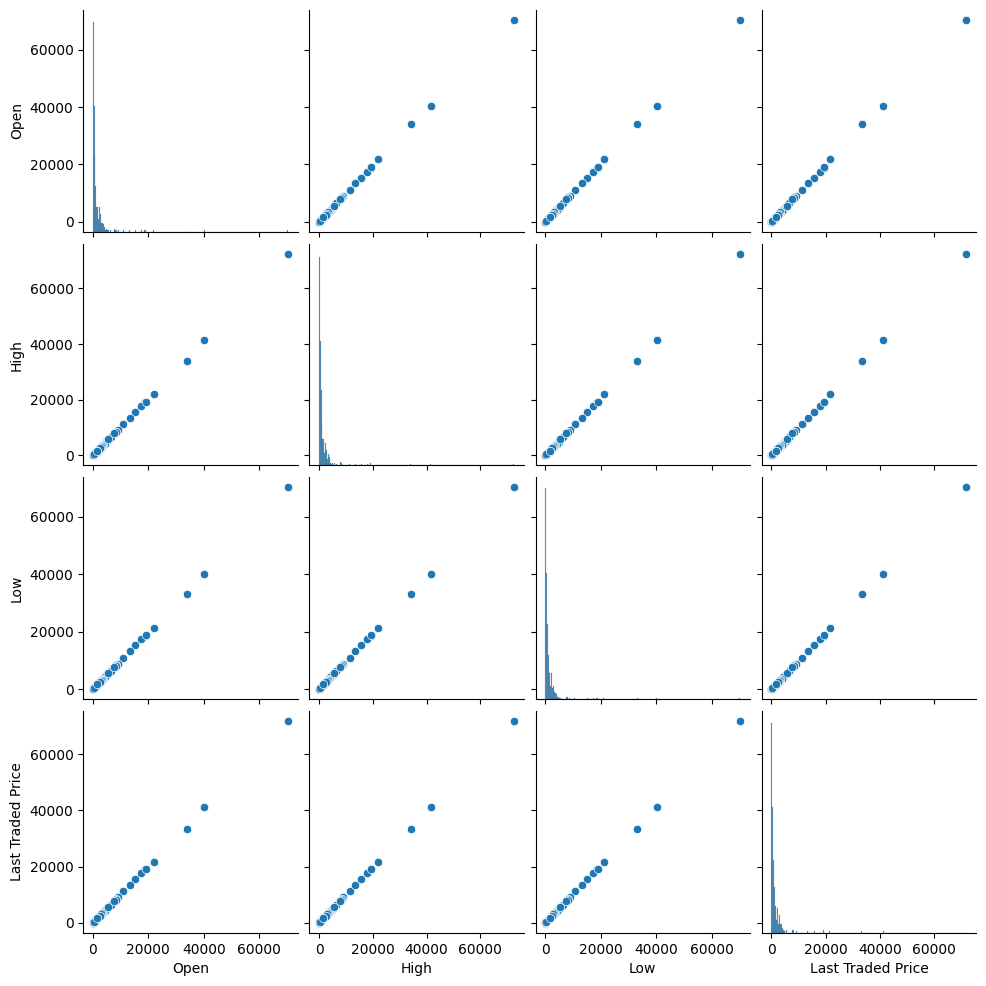

In [29]:
sns.pairplot(df[['Open', 'High', 'Low', 'Last Traded Price']])
plt.show()


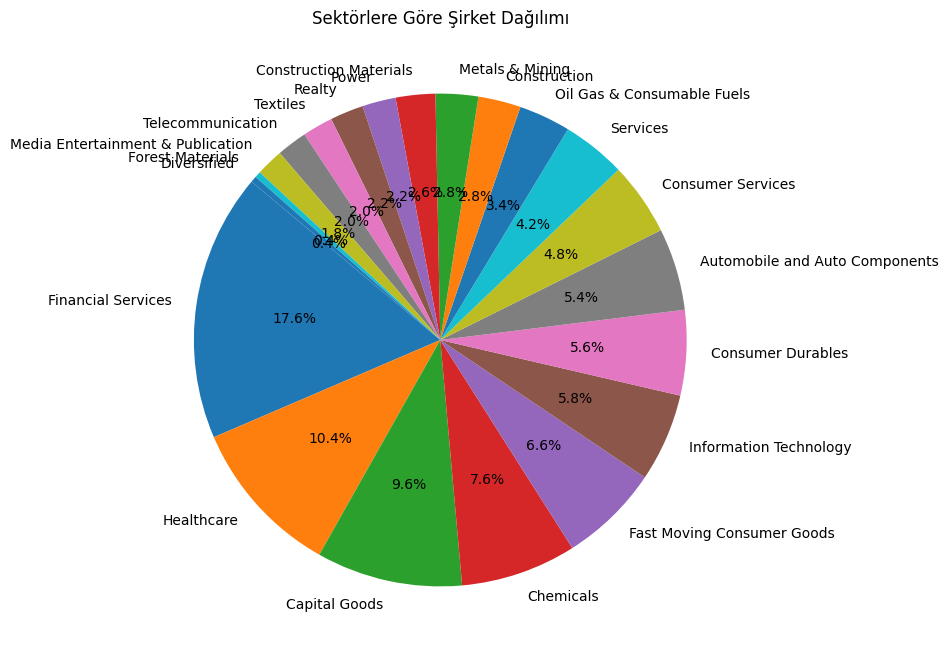

In [30]:
industry_counts = df['Industry'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(industry_counts, labels=industry_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Sektörlere Göre Şirket Dağılımı')
plt.show()


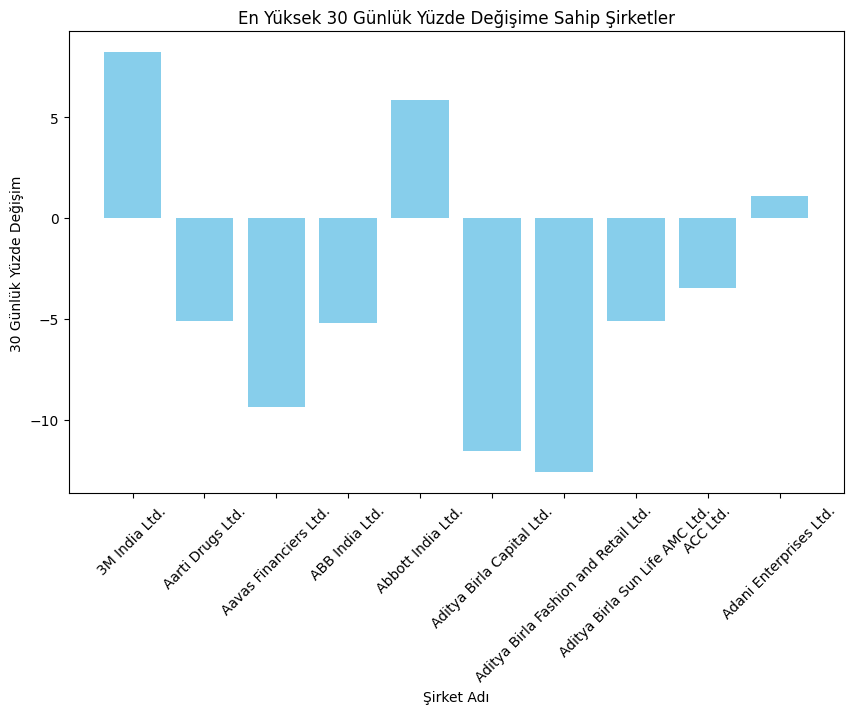

In [31]:
plt.figure(figsize=(10, 6))
plt.bar(df['Company Name'][:10], df['30 Day Percentage Change'][:10], color='skyblue')
plt.xlabel('Şirket Adı')
plt.ylabel('30 Günlük Yüzde Değişim')
plt.title('En Yüksek 30 Günlük Yüzde Değişime Sahip Şirketler')
plt.xticks(rotation=45)
plt.show()


# Beginner Level Questions

1. Veri setindeki en yaygın endüstri nedir?

In [33]:
en_yaygin_endustri = df['Industry'].value_counts().idxmax()

print("En yaygın endüstri: {}".format(en_yaygin_endustri))

En yaygın endüstri: Financial Services


2. Şirketlerin en düşük ve en yüksek günlük hisse fiyatları arasındaki ortalama fark nedir?


In [34]:
ortalama_fark = (df['High'] - df['Low']).mean()

print("Şirketlerin en düşük ve en yüksek günlük hisse fiyatları arasındaki ortalama fark: {}".format(ortalama_fark))


Şirketlerin en düşük ve en yüksek günlük hisse fiyatları arasındaki ortalama fark: 49.76257485029942


3. En fazla işlem gören 5 şirketi belirleyin.


In [35]:
df = df.sort_values(by='Share Volume', ascending=False)

top_5 = df.head(5)
top_5

,Company Name,Symbol,Industry,Series,Open,High,Low,Previous Close,Last Traded Price,Change,Percentage Change,Share Volume,Value (Indian Rupee),52 Week High,52 Week Low,365 Day Percentage Change,30 Day Percentage Change
338,Oil & Natural Gas Corporation Ltd.,ONGC,Oil Gas & Consumable Fuels,EQ,148.95,151.15,130.00,151.55,131.4,-20.15,-13.30,125788305,1.714369e+10,194.95,108.50,28.76,0.20
498,Zomato Ltd.,ZOMATO,Consumer Services,EQ,54.15,56.70,52.55,53.85,56.0,2.15,3.99,112078641,6.193466e+09,169.00,50.05,-11.06,-27.86
212,Vodafone Idea Ltd.,IDEA,Telecommunication,EQ,8.35,8.60,8.20,8.40,8.5,0.10,1.19,65435996,5.476993e+08,16.80,4.55,15.58,-12.50
214,IDFC First Bank Ltd.,IDFCFIRSTB,Financial Services,EQ,31.35,32.45,30.60,31.45,32.4,0.95,3.02,38981951,1.227542e+09,56.25,28.95,41.97,-13.36
383,Reliance Industries Ltd.,RELIANCE,Oil Gas & Consumable Fuels,EQ,2574.90,2592.00,2365.00,2595.65,2406.0,-189.65,-7.31,37841671,9.211987e+10,2856.15,2016.25,22.98,-1.41


4. Hangi hisse senedi, 30 günlük yüzde değişim açısından en fazla artışı yaşamıştır?



In [36]:
max_30_day_change_stock = df[df['30 Day Percentage Change'] == df['30 Day Percentage Change'].max()]['Company Name'].values[0]
print("30 günlük yüzde değişim açısından en fazla artış yaşayan hisse senedi: {}".format(max_30_day_change_stock))


30 günlük yüzde değişim açısından en fazla artış yaşayan hisse senedi: Asahi India Glass Ltd.



5. Hangi endüstri, ortalama günlük hisse senedi fiyatındaki değişim bakımından en gelgitlidir?


In [37]:
industry_avg_changes = df.groupby('Industry')['365 Day Percentage Change'].mean()

# Endüstrileri ortalama değişime göre sırala
sorted_industries = industry_avg_changes.sort_values()

most_volatile_industry = sorted_industries.index[-1]

print("En Gelgitli Endüstri:", most_volatile_industry)   # en yüksek ortalama değişim


En Gelgitli Endüstri: Textiles


6. En yüksek işlem hacmine sahip olan 3 şirketi listeleyin.


In [38]:
top_3 = df.sort_values(by = 'Share Volume', ascending=False).head(3)
top_3

,Company Name,Symbol,Industry,Series,Open,High,Low,Previous Close,Last Traded Price,Change,Percentage Change,Share Volume,Value (Indian Rupee),52 Week High,52 Week Low,365 Day Percentage Change,30 Day Percentage Change
338,Oil & Natural Gas Corporation Ltd.,ONGC,Oil Gas & Consumable Fuels,EQ,148.95,151.15,130.00,151.55,131.4,-20.15,-13.30,125788305,1.714369e+10,194.95,108.50,28.76,0.20
498,Zomato Ltd.,ZOMATO,Consumer Services,EQ,54.15,56.70,52.55,53.85,56.0,2.15,3.99,112078641,6.193466e+09,169.00,50.05,-11.06,-27.86
212,Vodafone Idea Ltd.,IDEA,Telecommunication,EQ,8.35,8.60,8.20,8.40,8.5,0.10,1.19,65435996,5.476993e+08,16.80,4.55,15.58,-12.50


7. Hangi şirketlerin, hisse senedi fiyatlarının yüzde değişimi en fazladır?


In [39]:
company_changes = df.groupby('Company Name')['365 Day Percentage Change'].mean()

# Şirketleri yüzde değişime göre sırala
sorted_companies = company_changes.sort_values(ascending=False)

top_companies = sorted_companies.head()

print("En Fazla Yüzde Değişime Sahip Şirketler:")
print(top_companies)


En Fazla Yüzde Değişime Sahip Şirketler:
Company Name
Gujarat Fluorochemicals Ltd.    138.90
Trident Ltd.                    136.70
KPIT Technologies Ltd.           99.33
Linde India Ltd.                 94.42
TTK Prestige Ltd.                91.14
Name: 365 Day Percentage Change, dtype: float64


8. Endüstriler arasında hisse senedi fiyatlarının 365 günlük sürede en çok değiştiği ve en az değiştiği endüstrileri belirleyin.



In [40]:
endustri_degisim = df.groupby('Industry')['365 Day Percentage Change'].mean()
en_cok_degisen_endustri = endustri_degisim.idxmax()
en_az_degisen_endustri = endustri_degisim.idxmin()

print("Hisse senedi fiyatlarının en çok değiştiği endüstri: {}".format(en_cok_degisen_endustri))
print("Hisse senedi fiyatlarının en az değiştiği endüstri: {}".format(en_az_degisen_endustri))


Hisse senedi fiyatlarının en çok değiştiği endüstri: Textiles
Hisse senedi fiyatlarının en az değiştiği endüstri: Diversified


9. Endüstriler arasında hisse senedi fiyatlarının 30 günde en çok değiştiği ve en az değiştiği endüstrileri belirleyin.


In [41]:
endustri_degisim = df.groupby('Industry')['30 Day Percentage Change'].mean()
en_cok_degisen_endustri = endustri_degisim.idxmax()
en_az_degisen_endustri = endustri_degisim.idxmin()

print("Hisse senedi fiyatlarının en çok değiştiği endüstri: {}".format(en_cok_degisen_endustri))
print("Hisse senedi fiyatlarının en az değiştiği endüstri: {}".format(en_az_degisen_endustri))

Hisse senedi fiyatlarının en çok değiştiği endüstri: Diversified
Hisse senedi fiyatlarının en az değiştiği endüstri: Metals & Mining


10. Hisse senedi fiyatlarının yıllık 365 günlük değişimi ile en çok artan ve en çok düşen hisse senetlerini belirleyin.

In [42]:
en_cok_artan = df[df['365 Day Percentage Change'] == df['365 Day Percentage Change'].max()]
en_cok_dusen = df[df['365 Day Percentage Change'] == df['365 Day Percentage Change'].min()]

print("En çok artan hisse senedi:")
print(en_cok_artan[['Company Name', '365 Day Percentage Change']])

print("\nEn çok düşen hisse senedi:")
print(en_cok_dusen[['Company Name', '365 Day Percentage Change']])


En çok artan hisse senedi:
                     Company Name  365 Day Percentage Change
148  Gujarat Fluorochemicals Ltd.                      138.9

En çok düşen hisse senedi:
                                         Company Name  \
498                                       Zomato Ltd.   
341                        One 97 Communications Ltd.   
465              Tata Teleservices (Maharashtra) Ltd.   
360                           Poonawalla Fincorp Ltd.   
420     Star Health and Allied Insurance Company Ltd.   
119                        Devyani International Ltd.   
10                            Adani Green Energy Ltd.   
21                               Alok Industries Ltd.   
377                       Restaurant Brands Asia Ltd.   
92             CG Power and Industrial Solutions Ltd.   
499                           Zydus Lifesciences Ltd.   
12                            Adani Transmission Ltd.   
389                      RattanIndia Enterprises Ltd.   
300                      

# Indermediate Level Questions

1. Endüstriler arasında hisse senedi fiyatlarının en çok değiştiği ve en az değiştiği endüstrileri belirleyin.



In [43]:
df['Percentage Change'] = pd.to_numeric(df['Percentage Change'], errors='coerce')


In [44]:
industry_max_price_change = df.groupby('Industry')['Percentage Change'].max()
max_price_change_industry = industry_max_price_change.idxmax()

industry_min_price_change = df.groupby('Industry')['Percentage Change'].min()
min_price_change_industry = industry_min_price_change.idxmin()

print("En çok değişim gösteren endüstri: ", max_price_change_industry)
print("En az değişim gösteren endüstri: ", min_price_change_industry)


En çok değişim gösteren endüstri:  Financial Services
En az değişim gösteren endüstri:  Oil Gas & Consumable Fuels


2.  Şirketlerin günlük ticaret hacimlerinin endüstriye göre dağılımını gösteren bir grafik oluşturun.


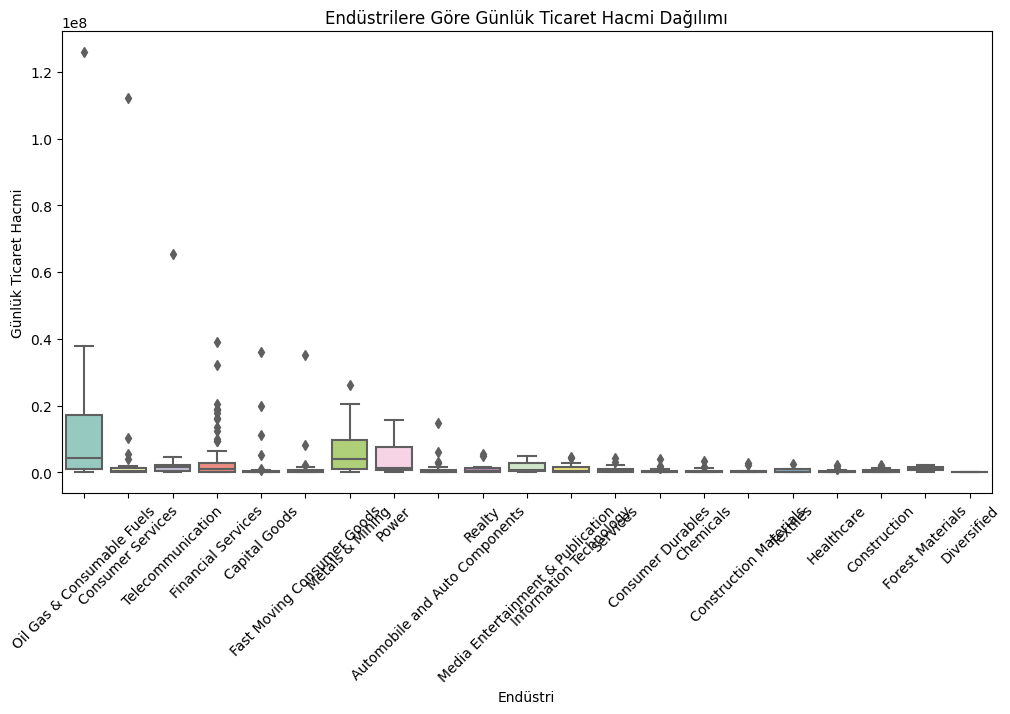

In [45]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Industry', y='Share Volume', data=df, palette='Set3')
plt.xlabel('Endüstri')
plt.ylabel('Günlük Ticaret Hacmi')
plt.title('Endüstrilere Göre Günlük Ticaret Hacmi Dağılımı')
plt.xticks(rotation=45)
plt.show()



3. Hangi endüstri, toplam ticaret hacmi (Share Volume) bakımından en büyük paya sahiptir?

In [46]:
industry = df.groupby('Industry')['Share Volume'].sum()
max_share = industry.idxmax()
print("En büyük ticaret hacme sahip endüstri: ",max_share)

En büyük ticaret hacme sahip endüstri:  Financial Services


4. En yüksek en yüksek Value (Indian Rupee)'i ve sembolü nedir?


In [47]:
max_value_row = df[df['Value (Indian Rupee)'] == df['Value (Indian Rupee)'].max()]
max_value_company = max_value_row['Company Name'].values[0]
max_value_company_symbol = max_value_row['Symbol'].values[0]

print("En yüksek Value (Indian Rupee) değerine sahip şirket:", max_value_company)
print("En yüksek Value (Indian Rupee) değerine sahip şirketin sembolü:", max_value_company_symbol)



En yüksek Value (Indian Rupee) değerine sahip şirket: Reliance Industries Ltd.
En yüksek Value (Indian Rupee) değerine sahip şirketin sembolü: RELIANCE


5. Hisse senedi fiyatlarındaki değişimler ile şirketlerin kapanış fiyatlarındaki değişimler arasında bir ilişki var mıdır?


Hisse Senedi Fiyatlarındaki Değişim ile Kapanış Fiyatlarındaki Değişim Arasındaki Korelasyon: 0.03


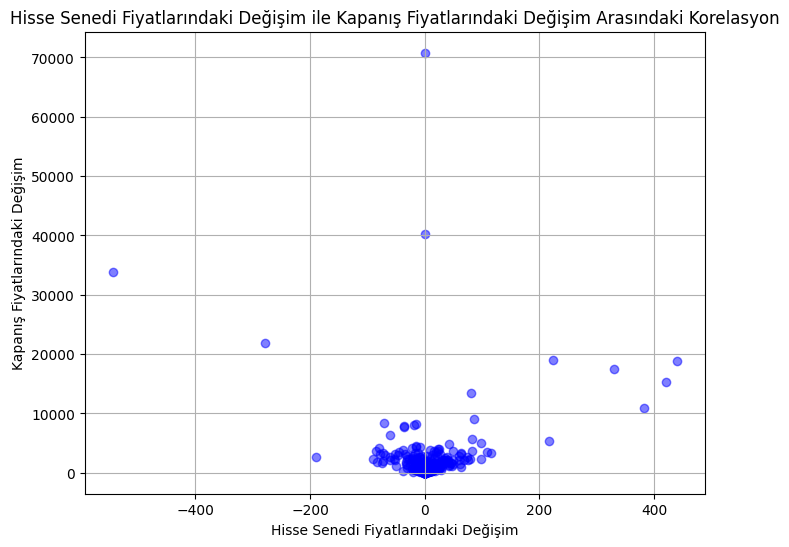

In [48]:

correlation = df['Change'].corr(df['Previous Close'])

print("Hisse Senedi Fiyatlarındaki Değişim ile Kapanış Fiyatlarındaki Değişim Arasındaki Korelasyon: {:.2f}".format(correlation))

plt.figure(figsize=(8, 6))
plt.scatter(df['Change'], df['Previous Close'], color='b', alpha=0.5)
plt.title('Hisse Senedi Fiyatlarındaki Değişim ile Kapanış Fiyatlarındaki Değişim Arasındaki Korelasyon')
plt.xlabel('Hisse Senedi Fiyatlarındaki Değişim')
plt.ylabel('Kapanış Fiyatlarındaki Değişim')
plt.grid(True)
plt.show()


6.  Hangi şirketler, son bir yıldaki (365 gün) en yüksek ve en düşük fiyat değişimine sahiptir?


In [49]:
max_365 = df[df['365 Day Percentage Change'] == df['365 Day Percentage Change'].max()]
min_365 = df[df['365 Day Percentage Change'] == df['365 Day Percentage Change'].min()]

company_max = max_365['Company Name'].values
company_min = min_365['Company Name'].values

print('En yüksek:  ', company_max)
print('En düşük:  ', company_min)

En yüksek:   ['Gujarat Fluorochemicals Ltd.']
En düşük:   ['Zomato Ltd.' 'One 97 Communications Ltd.'
 'Tata Teleservices (Maharashtra) Ltd.' 'Poonawalla Fincorp Ltd.'
 'Star Health and Allied Insurance Company Ltd.'
 'Devyani International Ltd.' 'Adani Green Energy Ltd.'
 'Alok Industries Ltd.' 'Restaurant Brands Asia Ltd.'
 'CG Power and Industrial Solutions Ltd.' 'Zydus Lifesciences Ltd.'
 'Adani Transmission Ltd.' 'RattanIndia Enterprises Ltd.'
 'Metro Brands Ltd.' 'PCBL Ltd.' 'PB Fintech Ltd.' 'IIFL Finance Ltd.'
 'Borosil Renewables Ltd.' 'Aptus Value Housing Finance India Ltd.'
 'Adani Total Gas Ltd.' 'Angel One Ltd.' 'Affle (India) Ltd.'
 'Latent View Analytics Ltd.' 'Praj Industries Ltd.'
 'Vijaya Diagnostic Centre Ltd.' 'Hinduja Global Solutions Ltd.'
 'RHI MAGNESITA INDIA LTD.' 'Tanla Platforms Ltd.'
 'Nuvoco Vistas Corporation Ltd.' 'Sapphire Foods India Ltd.'
 'FSN E-Commerce Ventures Ltd.' 'Saregama India Ltd'
 'Chemplast Sanmar Ltd.' 'C.E. Info Systems Ltd.'
 'Clean Scie

7. Veri setindeki şirketlerin her biri için, sektörlerinin günlük işlem hacmi ile kendi günlük işlem hacimleri arasındaki farkı hesaplayın.

In [50]:
# Sektör bazında ortalama günlük işlem hacmi hesaplama
industry_mean_volume = df.groupby('Industry')['Share Volume'].mean()

# Her şirketin kendi günlük işlem hacmi ile sektör ortalama işlem hacmi arasındaki farkı hesaplama
df['Volume Difference'] = df.apply(lambda row: row['Share Volume'] - industry_mean_volume[row['Industry']], axis=1)

print(df[['Company Name', 'Industry', 'Share Volume', 'Volume Difference']].head())


                           Company Name                    Industry  \
338  Oil & Natural Gas Corporation Ltd.  Oil Gas & Consumable Fuels   
498                         Zomato Ltd.           Consumer Services   
212                  Vodafone Idea Ltd.           Telecommunication   
214                IDFC First Bank Ltd.          Financial Services   
383            Reliance Industries Ltd.  Oil Gas & Consumable Fuels   

     Share Volume  Volume Difference  
338     125788305       1.096121e+08  
498     112078641       1.061409e+08  
212      65435996       5.750007e+07  
214      38981951       3.521823e+07  
383      37841671       2.166544e+07  


8. Hangi şirket, 52 haftalık düşük fiyat (52 Week Low) ve 52 haftalık yüksek fiyat (52 Week High) arasındaki fark bakımından en yükseğe sahiptir?


In [51]:
df['52 Week High-Low Difference'] = df['52 Week High'] - df['52 Week Low']

max = df[df['52 Week High-Low Difference'] == df['52 Week High-Low Difference'].max()]

max

,Company Name,Symbol,Industry,Series,Open,High,Low,Previous Close,Last Traded Price,Change,Percentage Change,Share Volume,Value (Indian Rupee),52 Week High,52 Week Low,365 Day Percentage Change,30 Day Percentage Change,Volume Difference,52 Week High-Low Difference
311,MRF Ltd.,MRF,Automobile and Auto Components,EQ,70300.0,72500.0,70300.0,70800.9,71900.0,0.75,1.55,5409,3.860072e+08,87550.0,63000.0,11.59,-8.82,-1.296456e+06,24550.0


9. Her endüstri için, şirketlerin ortalama 30 günlük yüzde değişimini hesaplayın. Hangi endüstrilerde şirketler genellikle pozitif 30 günlük yüzde değişime sahiptir? Hangi endüstrilerde negatif 30 günlük yüzde değişim yaygındır?


In [52]:
# ortalama 30 günlük yüzde değişim
industry_average_30day_change = df.groupby('Industry')['30 Day Percentage Change'].mean()

# Pozitif ve negatif ortalama yüzdeler
positive_changes = industry_average_30day_change[industry_average_30day_change > 0]
negative_changes = industry_average_30day_change[industry_average_30day_change < 0]

print("Pozitif 30 Günlük Yüzde Değişime Sahip Endüstriler:")
print(positive_changes)

print("\nNegatif 30 Günlük Yüzde Değişime Sahip Endüstriler:")
print(negative_changes)


Pozitif 30 Günlük Yüzde Değişime Sahip Endüstriler:
Industry
Automobile and Auto Components    0.387407
Diversified                       1.710000
Name: 30 Day Percentage Change, dtype: float64

Negatif 30 Günlük Yüzde Değişime Sahip Endüstriler:
Industry
Capital Goods                        -5.295000
Chemicals                            -8.003947
Construction                         -9.830000
Construction Materials               -7.055385
Consumer Durables                    -4.860000
Consumer Services                    -7.830833
Fast Moving Consumer Goods           -5.085152
Financial Services                   -8.426705
Forest Materials                     -5.540000
Healthcare                           -5.558462
Information Technology               -9.159655
Media Entertainment & Publication   -11.538889
Metals & Mining                     -14.184286
Oil Gas & Consumable Fuels           -5.900588
Power                                -6.367273
Realty                               -3

10. Bir şirketin 52 haftalık en yüksek (52 Week High) fiyatı ile en düşük (52 Week Low) fiyatı arasındaki oranı hesaplayın.

In [53]:
# Veri setindeki rastgele bir satır seçme
random_company = df.sample()

company_name = random_company['Company Name'].values[0]

# 52 haftalık en yüksek ve en düşük fiyatlar
week_high = random_company['52 Week High'].values[0]
week_low = random_company['52 Week Low'].values[0]

week_high_low_ratio = week_high / week_low

print(f"{company_name} için 52 Haftalık En Yüksek-En Düşük Fiyat Oranı: {week_high_low_ratio}")

V-Guard Industries Ltd. için 52 Haftalık En Yüksek-En Düşük Fiyat Oranı: 1.518232044198895


# Numeric and Categorical Columns

In [54]:
# one-hot encoding
industry_encoded = pd.get_dummies(df['Industry'], prefix='Industry')
df = pd.concat([df, industry_encoded], axis=1)
df.drop('Industry', axis=1, inplace=True)

In [55]:
df

,Company Name,Symbol,Series,Open,High,Low,Previous Close,Last Traded Price,Change,Percentage Change,...,Industry_Healthcare,Industry_Information Technology,Industry_Media Entertainment & Publication,Industry_Metals & Mining,Industry_Oil Gas & Consumable Fuels,Industry_Power,Industry_Realty,Industry_Services,Industry_Telecommunication,Industry_Textiles
338,Oil & Natural Gas Corporation Ltd.,ONGC,EQ,148.95,151.15,130.00,151.55,131.40,-20.15,-13.30,...,False,False,False,False,True,False,False,False,False,False
498,Zomato Ltd.,ZOMATO,EQ,54.15,56.70,52.55,53.85,56.00,2.15,3.99,...,False,False,False,False,False,False,False,False,False,False
212,Vodafone Idea Ltd.,IDEA,EQ,8.35,8.60,8.20,8.40,8.50,0.10,1.19,...,False,False,False,False,False,False,False,False,True,False
214,IDFC First Bank Ltd.,IDFCFIRSTB,EQ,31.35,32.45,30.60,31.45,32.40,0.95,3.02,...,False,False,False,False,False,False,False,False,False,False
383,Reliance Industries Ltd.,RELIANCE,EQ,2574.90,2592.00,2365.00,2595.65,2406.00,-189.65,-7.31,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349,Procter & Gamble Health Ltd.,PGHL,EQ,4192.00,4194.25,4102.10,4190.85,4111.00,-79.85,-1.91,...,True,False,False,False,False,False,False,False,False,False
401,Sheela Foam Ltd.,SFL,EQ,2649.00,2679.00,2612.00,2660.45,2651.00,-9.45,-0.36,...,False,False,False,False,False,False,False,False,False,False
89,Cera Sanitaryware Ltd,CERA,EQ,4141.70,4160.00,4085.90,4132.75,4111.25,-21.50,-0.52,...,False,False,False,False,False,False,False,False,False,False
203,Honeywell Automation India Ltd.,HONAUT,EQ,34069.80,34069.80,33133.65,33787.70,33244.05,-543.65,-1.61,...,False,False,False,False,False,False,False,False,False,False


In [56]:
# one-hot encoding
series_encoded = pd.get_dummies(df['Series'], prefix='Series')
# Oluşturulan sütunları veriye ekleme
df = pd.concat([df, series_encoded], axis=1)

df.drop('Series', axis=1, inplace=True)


In [57]:
df

,Company Name,Symbol,Open,High,Low,Previous Close,Last Traded Price,Change,Percentage Change,Share Volume,...,Industry_Media Entertainment & Publication,Industry_Metals & Mining,Industry_Oil Gas & Consumable Fuels,Industry_Power,Industry_Realty,Industry_Services,Industry_Telecommunication,Industry_Textiles,Series_BE,Series_EQ
338,Oil & Natural Gas Corporation Ltd.,ONGC,148.95,151.15,130.00,151.55,131.40,-20.15,-13.30,125788305,...,False,False,True,False,False,False,False,False,False,True
498,Zomato Ltd.,ZOMATO,54.15,56.70,52.55,53.85,56.00,2.15,3.99,112078641,...,False,False,False,False,False,False,False,False,False,True
212,Vodafone Idea Ltd.,IDEA,8.35,8.60,8.20,8.40,8.50,0.10,1.19,65435996,...,False,False,False,False,False,False,True,False,False,True
214,IDFC First Bank Ltd.,IDFCFIRSTB,31.35,32.45,30.60,31.45,32.40,0.95,3.02,38981951,...,False,False,False,False,False,False,False,False,False,True
383,Reliance Industries Ltd.,RELIANCE,2574.90,2592.00,2365.00,2595.65,2406.00,-189.65,-7.31,37841671,...,False,False,True,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349,Procter & Gamble Health Ltd.,PGHL,4192.00,4194.25,4102.10,4190.85,4111.00,-79.85,-1.91,3956,...,False,False,False,False,False,False,False,False,False,True
401,Sheela Foam Ltd.,SFL,2649.00,2679.00,2612.00,2660.45,2651.00,-9.45,-0.36,3071,...,False,False,False,False,False,False,False,False,False,True
89,Cera Sanitaryware Ltd,CERA,4141.70,4160.00,4085.90,4132.75,4111.25,-21.50,-0.52,2801,...,False,False,False,False,False,False,False,False,False,True
203,Honeywell Automation India Ltd.,HONAUT,34069.80,34069.80,33133.65,33787.70,33244.05,-543.65,-1.61,1860,...,False,False,False,False,False,False,False,False,False,True


kategorik bir değişkeni sayısal bir değere dönüştürüldüğünde, bu değişkenin farklı kategorileri arasında belirli bir sıralama veya düzen olmadığı için sorun olabilir.Bu durumda, o kategorinin hedef değişken üzerindeki etkisini yansıtan bir değeri kullanılabilir. Last Traded Price ortalamalarını kullanarak her şirketin ortalama hisse fiyatını temsil eden bir sayısal değer oluşturarak bu kullanıldı.

In [58]:
# Company Name sütununu hedef değişkenle (Last Traded Price) gruplayıp ortalama değerleri hesaplama
company_price_mapping = df.groupby('Company Name')['Last Traded Price'].mean().to_dict()

# sütunu hedef değişkenin ortalamalarıyla kodla
df['Company Name Encoded'] = df['Company Name'].map(company_price_mapping)

df.drop('Company Name', axis=1, inplace=True)


In [59]:
df

,Symbol,Open,High,Low,Previous Close,Last Traded Price,Change,Percentage Change,Share Volume,Value (Indian Rupee),...,Industry_Metals & Mining,Industry_Oil Gas & Consumable Fuels,Industry_Power,Industry_Realty,Industry_Services,Industry_Telecommunication,Industry_Textiles,Series_BE,Series_EQ,Company Name Encoded
338,ONGC,148.95,151.15,130.00,151.55,131.40,-20.15,-13.30,125788305,1.714369e+10,...,False,True,False,False,False,False,False,False,True,131.40
498,ZOMATO,54.15,56.70,52.55,53.85,56.00,2.15,3.99,112078641,6.193466e+09,...,False,False,False,False,False,False,False,False,True,56.00
212,IDEA,8.35,8.60,8.20,8.40,8.50,0.10,1.19,65435996,5.476993e+08,...,False,False,False,False,False,True,False,False,True,8.50
214,IDFCFIRSTB,31.35,32.45,30.60,31.45,32.40,0.95,3.02,38981951,1.227542e+09,...,False,False,False,False,False,False,False,False,True,32.40
383,RELIANCE,2574.90,2592.00,2365.00,2595.65,2406.00,-189.65,-7.31,37841671,9.211987e+10,...,False,True,False,False,False,False,False,False,True,2406.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349,PGHL,4192.00,4194.25,4102.10,4190.85,4111.00,-79.85,-1.91,3956,1.643318e+07,...,False,False,False,False,False,False,False,False,True,4111.00
401,SFL,2649.00,2679.00,2612.00,2660.45,2651.00,-9.45,-0.36,3071,8.128231e+06,...,False,False,False,False,False,False,False,False,True,2651.00
89,CERA,4141.70,4160.00,4085.90,4132.75,4111.25,-21.50,-0.52,2801,1.156642e+07,...,False,False,False,False,False,False,False,False,True,4111.25
203,HONAUT,34069.80,34069.80,33133.65,33787.70,33244.05,-543.65,-1.61,1860,6.203643e+07,...,False,False,False,False,False,False,False,False,True,33244.05


In [60]:
symbol_encoded = pd.get_dummies(df['Symbol'], prefix='Symbol')
df = pd.concat([df, symbol_encoded], axis=1)
df.drop('Symbol', axis=1, inplace=True)


In [61]:
df

,Open,High,Low,Previous Close,Last Traded Price,Change,Percentage Change,Share Volume,Value (Indian Rupee),52 Week High,...,Symbol_WHIRLPOOL,Symbol_WIPRO,Symbol_WOCKPHARMA,Symbol_YESBANK,Symbol_ZEEL,Symbol_ZENSARTECH,Symbol_ZFCVINDIA,Symbol_ZOMATO,Symbol_ZYDUSLIFE,Symbol_ZYDUSWELL
338,148.95,151.15,130.00,151.55,131.40,-20.15,-13.30,125788305,1.714369e+10,194.95,...,False,False,False,False,False,False,False,False,False,False
498,54.15,56.70,52.55,53.85,56.00,2.15,3.99,112078641,6.193466e+09,169.00,...,False,False,False,False,False,False,False,True,False,False
212,8.35,8.60,8.20,8.40,8.50,0.10,1.19,65435996,5.476993e+08,16.80,...,False,False,False,False,False,False,False,False,False,False
214,31.35,32.45,30.60,31.45,32.40,0.95,3.02,38981951,1.227542e+09,56.25,...,False,False,False,False,False,False,False,False,False,False
383,2574.90,2592.00,2365.00,2595.65,2406.00,-189.65,-7.31,37841671,9.211987e+10,2856.15,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349,4192.00,4194.25,4102.10,4190.85,4111.00,-79.85,-1.91,3956,1.643318e+07,5851.75,...,False,False,False,False,False,False,False,False,False,False
401,2649.00,2679.00,2612.00,2660.45,2651.00,-9.45,-0.36,3071,8.128231e+06,4055.00,...,False,False,False,False,False,False,False,False,False,False
89,4141.70,4160.00,4085.90,4132.75,4111.25,-21.50,-0.52,2801,1.156642e+07,6450.00,...,False,False,False,False,False,False,False,False,False,False
203,34069.80,34069.80,33133.65,33787.70,33244.05,-543.65,-1.61,1860,6.203643e+07,47275.95,...,False,False,False,False,False,False,False,False,False,False


In [62]:
df['Series'] = df['Series_EQ']
df.loc[df['Series_BE'] == 1, 'Series'] = 0

df.drop(['Series_EQ', 'Series_BE'], axis=1, inplace=True)


In [63]:
df

,Open,High,Low,Previous Close,Last Traded Price,Change,Percentage Change,Share Volume,Value (Indian Rupee),52 Week High,...,Symbol_WIPRO,Symbol_WOCKPHARMA,Symbol_YESBANK,Symbol_ZEEL,Symbol_ZENSARTECH,Symbol_ZFCVINDIA,Symbol_ZOMATO,Symbol_ZYDUSLIFE,Symbol_ZYDUSWELL,Series
338,148.95,151.15,130.00,151.55,131.40,-20.15,-13.30,125788305,1.714369e+10,194.95,...,False,False,False,False,False,False,False,False,False,True
498,54.15,56.70,52.55,53.85,56.00,2.15,3.99,112078641,6.193466e+09,169.00,...,False,False,False,False,False,False,True,False,False,True
212,8.35,8.60,8.20,8.40,8.50,0.10,1.19,65435996,5.476993e+08,16.80,...,False,False,False,False,False,False,False,False,False,True
214,31.35,32.45,30.60,31.45,32.40,0.95,3.02,38981951,1.227542e+09,56.25,...,False,False,False,False,False,False,False,False,False,True
383,2574.90,2592.00,2365.00,2595.65,2406.00,-189.65,-7.31,37841671,9.211987e+10,2856.15,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349,4192.00,4194.25,4102.10,4190.85,4111.00,-79.85,-1.91,3956,1.643318e+07,5851.75,...,False,False,False,False,False,False,False,False,False,True
401,2649.00,2679.00,2612.00,2660.45,2651.00,-9.45,-0.36,3071,8.128231e+06,4055.00,...,False,False,False,False,False,False,False,False,False,True
89,4141.70,4160.00,4085.90,4132.75,4111.25,-21.50,-0.52,2801,1.156642e+07,6450.00,...,False,False,False,False,False,False,False,False,False,True
203,34069.80,34069.80,33133.65,33787.70,33244.05,-543.65,-1.61,1860,6.203643e+07,47275.95,...,False,False,False,False,False,False,False,False,False,True


# Random Forest and Synthetic Data

In [67]:
X = df.drop(columns=['Last Traded Price'])
y = df['Last Traded Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X, y)

# Sentetik veri oluşturma
num_samples = 10
sentetik_data = np.random.rand(num_samples, len(X.columns))
sentetik_veri = pd.DataFrame(sentetik_data, columns=X.columns)

sentetik_tahminler = rf_regressor.predict(sentetik_veri)

gercek_tahminler = rf_regressor.predict(X)
mse = mean_squared_error(y, gercek_tahminler)
r2 = r2_score(y, gercek_tahminler)
evs = explained_variance_score(y, gercek_tahminler)

true_false_tablo = pd.DataFrame({
    'Gerçek Değer': y,
    'Tahmin Edilen Değer': gercek_tahminler,
    'True/False': np.round(gercek_tahminler) == y
})

print("Sentetik Veri Tahminleri:")
print(sentetik_tahminler)
print("\nMean Squared Error Değeri:", mse)
print("R-squared (R-kare) Değeri:", r2)
print("Explained Variance Score:", evs)
print("\nTrue/False Tablosu:")
print(true_false_tablo)


Sentetik Veri Tahminleri:
[3605.5585 3605.4095 3605.426    10.699    10.9885 3605.2025 3605.291
   10.8215 3605.3375 3605.4455]

Mean Squared Error Değeri: 441248.9494392386
R-squared (R-kare) Değeri: 0.978473635180587
Explained Variance Score: 0.9785438847534977

True/False Tablosu:
     Gerçek Değer  Tahmin Edilen Değer  True/False
338        131.40             134.9575       False
498         56.00              55.6120        True
212          8.50               9.4260       False
214         32.40              32.1310       False
383       2406.00            2439.8175       False
..            ...                  ...         ...
349       4111.00            4162.1715       False
401       2651.00            2659.5280       False
89        4111.25            4096.6365       False
203      33244.05           33244.9640       False
275       9068.00            8924.1750       False

[501 rows x 3 columns]


Sentetik veriler random sampling yöntemi ile oluşturulmuştur. Bu yöntemle, belirli bir aralıktaki rastgele sayıları ve veri setindeki özelliklerin dağılımını temsil etmek amacıyla veri noktaları oluşturulur. Bu örnekte, veri setinizin özelliklerinin değer aralıklarını ve dağılımlarını temsil etmek için rastgele sayılar üretilmiştir.

Yani, her bir özellik için rastgele değerler oluşturulurken, bu değerler veri setinizdeki özelliklerin genel dağılımına benzetilmeye çalışılmıştır. Bu, modelin sentetik veriyi gerçek veriyle benzer bir şekilde işlemesine yardımcı olur.

# Gradient Boosting Regressor Synthetic Data

In [65]:

gb_regressor = GradientBoostingRegressor(random_state=42)  
gb_regressor.fit(X_train, y_train)

gb_y_pred = gb_regressor.predict(X_test)

gb_r2 = r2_score(y_test, gb_y_pred)
print("Gradient Boosting R-squared (R-kare) Değeri:", gb_r2)

gb_mse = mean_squared_error(y_test, gb_y_pred)
print("Gradient Boosting Mean Squared Error (Ortalama Kare Hata):", gb_mse)


Gradient Boosting R-squared (R-kare) Değeri: 0.7924762695983428
Gradient Boosting Mean Squared Error (Ortalama Kare Hata): 7662808.777866686


In [66]:
num_samples = 10
sentetik_data = np.random.rand(num_samples, len(X.columns))
sentetik_veri = pd.DataFrame(sentetik_data, columns=X.columns)

gb_sentetik_tahminler = gb_regressor.predict(sentetik_veri)

gb_sonuclar = pd.DataFrame({
    'Tahmin Edilen Değer': gb_sentetik_tahminler
})

print("Gradient Boosting Sentetik Veri Tahminleri:")
print(gb_sonuclar)

# Gerçek test verileri üzerinde tahminler yapma
gb_gercek_tahminler = gb_regressor.predict(X_test)

gb_mse = mean_squared_error(y_test, gb_gercek_tahminler)
gb_r2 = r2_score(y_test, gb_gercek_tahminler)
gb_evs = explained_variance_score(y_test, gb_gercek_tahminler)

print("Gradient Boosting Gerçek Veri Test Sonuçları:")
print("Mean Squared Error Değeri:", gb_mse)
print("R-squared (R-kare) Değeri:", gb_r2)
print("Explained Variance Score:", gb_evs)


gb_true_false_tablo = pd.DataFrame({
    'Gerçek Değer': y_test,
    'Tahmin Edilen Değer': gb_gercek_tahminler,
    'Doğru/Tuş': np.round(gb_gercek_tahminler) == y_test
})

print("\nGradient Boosting True/False Tablosu:")
print(gb_true_false_tablo)


Gradient Boosting Sentetik Veri Tahminleri:
   Tahmin Edilen Değer
0            41.388602
1            74.798599
2            53.910320
3            52.894218
4            68.000433
5            37.014486
6             6.524674
7            54.794697
8            42.315969
9            28.476334
Gradient Boosting Gerçek Veri Test Sonuçları:
Mean Squared Error Değeri: 7662808.777866686
R-squared (R-kare) Değeri: 0.7924762695983428
Explained Variance Score: 0.7935861224785223

Gradient Boosting True/False Tablosu:
     Gerçek Değer  Tahmin Edilen Değer  Doğru/Tuş
433        298.50           288.418052      False
186       2205.30          2161.521762      False
99        1458.00          1510.270641      False
86          16.80            27.233721      False
98         948.00           896.491121      False
..            ...                  ...        ...
443        413.70           391.752081      False
22         469.50           476.289617      False
320        649.90           634.